In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [2]:
df = pd.read_csv(r"C:\Users\hc\Documents\GitHub\AI-Q2-learning-resources\DLAssignments\data\Car Price Prediction\CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data = df.drop(['car_ID', 'price', 'CarName'], 1)

In [5]:
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [6]:
data.head(3)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26


In [7]:
data.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
dtype: object

In [8]:
data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

# One Hot Encoding for Categorical Variables

In [9]:
from keras.utils import to_categorical

fueltype_cat = pd.get_dummies(data.fueltype)


aspiration_cat = pd.get_dummies(data.aspiration)


doornumber_cat = pd.get_dummies(data.doornumber)

carbody_cat = pd.get_dummies(data.carbody)


drivewheel_cat = pd.get_dummies(data.drivewheel)

enginelocation_cat = pd.get_dummies(data.enginelocation)

enginetype_cat = pd.get_dummies(data.enginetype)


cylindernumber_cat = pd.get_dummies(data.cylindernumber)

fuelsystem_cat = pd.get_dummies(data.fuelsystem)

Using TensorFlow backend.


In [10]:
# merging all one hot encoded data together

one_hot_encoded_data = pd.concat([fueltype_cat, aspiration_cat, doornumber_cat, carbody_cat, drivewheel_cat, enginelocation_cat, enginetype_cat, cylindernumber_cat, fuelsystem_cat], 1)

one_hot_encoded_data.shape

(205, 38)

In [11]:
# Removing all categorical columns from data

data = data.drop(['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'carbody', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], 1)


In [12]:
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [13]:
targets = df['price']

In [14]:
# 50 percent of 205 = 102
train_data = data.iloc[:102] ############# 0 based so end at 143 @!%$#&^$&!@$
train_targets = targets.iloc[:102]

# 20 percent of 205 = 41
validation_data = data.iloc[102: 143]
validation_targets = targets.iloc[102: 143]

# 30 percent for test
# 205 - 143 = 62
test_data = data.iloc[143:]
test_targets = targets.iloc[143:]

# cross checking
print('Data, Targets', end='\n\n')
print('TRAIN')
print(train_data.shape)
print(train_targets.shape)
print('#'*15)

print('VALIDATION')
print(validation_data.shape)
print(validation_targets.shape)
print('#'*15)

print('TEST')
print(test_data.shape)
print(test_targets.shape)

Data, Targets

TRAIN
(102, 14)
(102,)
###############
VALIDATION
(41, 14)
(41,)
###############
TEST
(62, 14)
(62,)


# Normalization (for numerical data --- based on training data)

In [15]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

validation_data-=mean
validation_data /= std

test_data-=mean
test_data /= std


# concatenating numerical and one hot encoded data

In [16]:
train_data = pd.concat([train_data, one_hot_encoded_data.iloc[:102]], 1)
validation_data = pd.concat([validation_data, one_hot_encoded_data.iloc[102:143]], 1)
test_data = pd.concat([test_data, one_hot_encoded_data.iloc[143:]], 1)

In [17]:
train_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,diesel,gas,std,turbo,four,two,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1.889649,-1.499169,-0.222866,-0.666141,-1.848528,0.099290,0.047843,0.883804,-2.666879,-0.200614,0.224443,-0.464412,-0.611102,-0.520613,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1.889649,-1.499169,-0.222866,-0.666141,-1.848528,0.099290,0.047843,0.883804,-2.666879,-0.200614,0.224443,-0.464412,-0.611102,-0.520613,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.045207,-0.560551,-0.048002,-0.103272,-0.306548,0.555863,0.473876,-2.315518,0.486880,-0.200614,1.338023,-0.464412,-0.878623,-0.647957,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0.967428,0.282615,0.345442,0.178163,0.507274,-0.251025,-0.358824,-0.250133,0.207433,0.094194,-0.008632,0.622057,-0.209820,-0.138580,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.967428,0.218980,0.345442,0.258573,0.507274,0.557523,0.164034,-0.250133,0.207433,-0.495423,0.328031,0.622057,-1.012384,-1.157334,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.967428,0.282615,0.396445,0.218368,-0.006719,0.031219,0.164034,-0.250133,0.207433,-0.348018,0.198545,0.622057,-0.878623,-0.775302,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0.045207,1.237142,1.518490,2.268821,1.106933,0.590729,0.164034,-0.250133,0.207433,-0.348018,0.198545,0.622057,-0.878623,-0.775302,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0.045207,1.237142,1.518490,2.268821,1.106933,0.773358,0.164034,-0.250133,0.207433,-0.348018,0.198545,0.622057,-0.878623,-0.775302,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0.045207,1.237142,1.518490,2.268821,1.192599,0.992512,0.067208,-0.493120,0.207433,-0.406980,0.975462,0.622057,-1.146144,-1.412023,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
9,-0.877014,0.234889,0.462019,0.861648,-0.477879,0.937724,0.067208,-0.493120,0.207433,-0.790231,1.493406,0.622057,-1.279905,-1.157334,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [18]:
train_data.shape

(102, 52)

# cross checking shapes

In [19]:
print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(102, 52)
(41, 52)
(62, 52)


In [28]:
# BUILDING MODEL
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Dense(10, activation='relu', input_shape=(train_data.shape[1],)))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1))

# K Fold Cross Validation

In [29]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []


In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                530       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 679
Trainable params: 679
Non-trainable params: 0
_________________________________________________________________


In [31]:
# COMPILING
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [32]:
# FITTING
history = model.fit(train_data, train_targets, epochs=100, batch_size=32, validation_data= (validation_data, validation_targets))

Train on 102 samples, validate on 41 samples
Epoch 1/100
102/102 [==============================] - 0s 1ms/step - loss: 280090031.3725 - mae: 13788.2354 - val_loss: 280443907.9024 - val_mae: 14915.1709
Epoch 2/100
102/102 [==============================] - 0s 88us/step - loss: 280086627.2941 - mae: 13788.1504 - val_loss: 280441398.2439 - val_mae: 14915.0918
Epoch 3/100
102/102 [==============================] - 0s 88us/step - loss: 280083857.4118 - mae: 13788.0781 - val_loss: 280439650.3415 - val_mae: 14915.0332
Epoch 4/100
102/102 [==============================] - 0s 98us/step - loss: 280080884.0784 - mae: 13788.0059 - val_loss: 280436986.1463 - val_mae: 14914.9492
Epoch 5/100
102/102 [==============================] - 0s 98us/step - loss: 280077795.7647 - mae: 13787.9268 - val_loss: 280434748.0976 - val_mae: 14914.8799
Epoch 6/100
102/102 [==============================] - 0s 78us/step - loss: 280074505.0980 - mae: 13787.8457 - val_loss: 280431536.3902 - val_mae: 14914.7803
Epoch 7/

102/102 [==============================] - 0s 69us/step - loss: 279407301.8039 - mae: 13770.8223 - val_loss: 279731143.0244 - val_mae: 14892.9326
Epoch 53/100
102/102 [==============================] - 0s 59us/step - loss: 279378858.0392 - mae: 13770.0879 - val_loss: 279691504.0000 - val_mae: 14891.7090
Epoch 54/100
102/102 [==============================] - 0s 59us/step - loss: 279341895.2157 - mae: 13769.1426 - val_loss: 279659978.5366 - val_mae: 14890.7090
Epoch 55/100
102/102 [==============================] - 0s 78us/step - loss: 279309647.3725 - mae: 13768.2842 - val_loss: 279626471.8049 - val_mae: 14889.6572
Epoch 56/100
102/102 [==============================] - 0s 69us/step - loss: 279276285.0196 - mae: 13767.3828 - val_loss: 279595765.0732 - val_mae: 14888.6816
Epoch 57/100
102/102 [==============================] - 0s 69us/step - loss: 279245353.0980 - mae: 13766.5381 - val_loss: 279564170.5366 - val_mae: 14887.6719
Epoch 58/100
102/102 [==============================] - 0s 

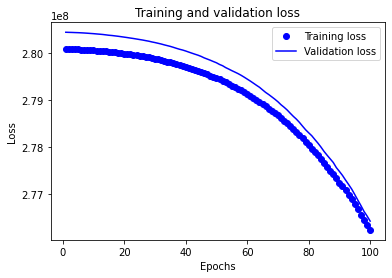

In [33]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
min(history.history['val_mae'])

14788.896484375

In [36]:
history.history.keys()

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])

In [27]:
train_data.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'diesel', 'gas',
       'std', 'turbo', 'four', 'two', 'convertible', 'hardtop', 'hatchback',
       'sedan', 'wagon', '4wd', 'fwd', 'rwd', 'front', 'rear', 'dohc', 'dohcv',
       'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'eight', 'five', 'four', 'six',
       'three', 'twelve', 'two', '1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],
      dtype='object')